C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


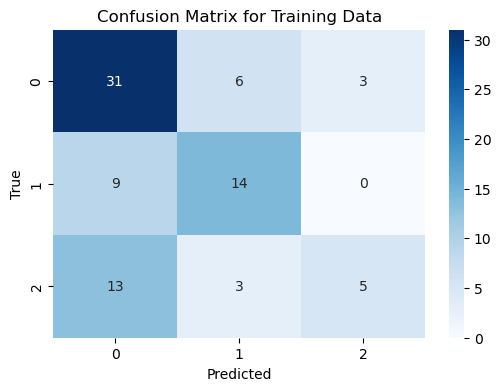

Training Data Performance:
Accuracy: 0.5952
Precision: 0.6014
Recall: 0.5952
F1-Score: 0.5703



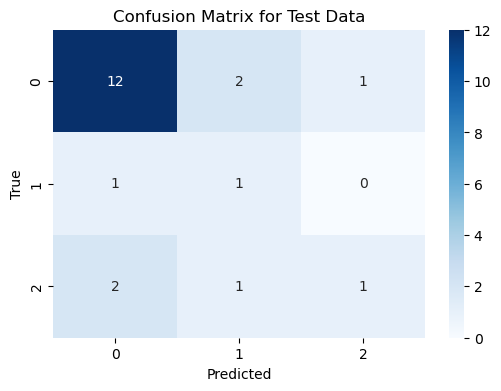

Test Data Performance:
Accuracy: 0.6667
Precision: 0.6905
Recall: 0.6667
F1-Score: 0.6667


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

def load_and_split_data(file_path, test_size=0.2, random_state=42):
    df = pd.read_csv(file_path)
    X = df.iloc[:, :-1]  # Features (all columns except last)
    y = df.iloc[:, -1]   # Target (last column)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def train_model(X_train, y_train):
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    return model

def evaluate_performance(model, X, y_true, dataset_name="Data"):
    y_pred = model.predict(X)
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {dataset_name} Data")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    

    return accuracy, precision, recall, f1

def main():
    
    file_path = r"C:/Users/Admin/Documents/Students_data.csv"  # Update with actual path
    
    X_train, X_test, y_train, y_test = load_and_split_data(file_path)
    

    model = train_model(X_train, y_train)
    
    accuracy_train, precision_train, recall_train, f1_train = evaluate_performance(model, X_train, y_train, dataset_name="Training")
    
    print("Training Data Performance:")
    print(f"Accuracy: {accuracy_train:.4f}")
    print(f"Precision: {precision_train:.4f}")
    print(f"Recall: {recall_train:.4f}")
    print(f"F1-Score: {f1_train:.4f}")
    print()
    
    accuracy_test, precision_test, recall_test, f1_test = evaluate_performance(model, X_test, y_test, dataset_name="Test")
    
    print("Test Data Performance:")
    print(f"Accuracy: {accuracy_test:.4f}")
    print(f"Precision: {precision_test:.4f}")
    print(f"Recall: {recall_test:.4f}")
    print(f"F1-Score: {f1_test:.4f}")

if __name__ == "__main__":
    main()



In [3]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from math import sqrt

def calculate_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    
    r2 = r2_score(y_true, y_pred)
    
    metrics = {
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
        "R2": r2
    }
    
    return metrics

def main():
    y_train = np.array([250000, 300000, 150000, 200000]) 
    y_train_pred = np.array([240000, 310000, 160000, 210000])  

    y_test = np.array([260000, 320000, 140000, 190000])  
    y_test_pred = np.array([255000, 330000, 150000, 195000])  

    train_metrics = calculate_regression_metrics(y_train, y_train_pred)
    print("Training Set Metrics:")
    for key, value in train_metrics.items():
        print(f"{key}: {value:.4f}")

    test_metrics = calculate_regression_metrics(y_test, y_test_pred)
    print("\nTest Set Metrics:")
    for key, value in test_metrics.items():
        print(f"{key}: {value:.4f}")

if __name__ == "__main__":
    main()


Training Set Metrics:
MSE: 100000000.0000
RMSE: 10000.0000
MAPE: 0.0475
R2: 0.9680

Test Set Metrics:
MSE: 62500000.0000
RMSE: 7905.6942
MAPE: 0.0371
R2: 0.9866


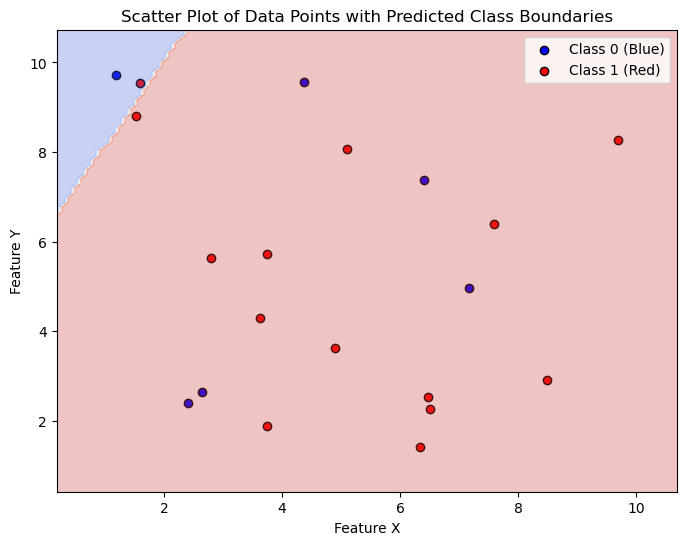

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

np.random.seed(42)  
X_train = np.random.uniform(1, 10, (20, 2))  
y_train = np.random.choice([0, 1], size=20)  

model = LogisticRegression()
model.fit(X_train, y_train)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1  # X-axis range
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1  # Y-axis range
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))  
X_test_grid = np.c_[xx.ravel(), yy.ravel()]  


y_test_pred = model.predict(X_test_grid)
y_test_pred = y_test_pred.reshape(xx.shape)  

plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Class 0 (Blue)', edgecolor='k')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Class 1 (Red)', edgecolor='k')

plt.contourf(xx, yy, y_test_pred, alpha=0.3, cmap=plt.cm.coolwarm) 

plt.xlabel('Feature X') 
plt.ylabel('Feature Y')  
plt.title('Scatter Plot of Data Points with Predicted Class Boundaries') 
plt.legend(loc='upper right') 
plt.show()  


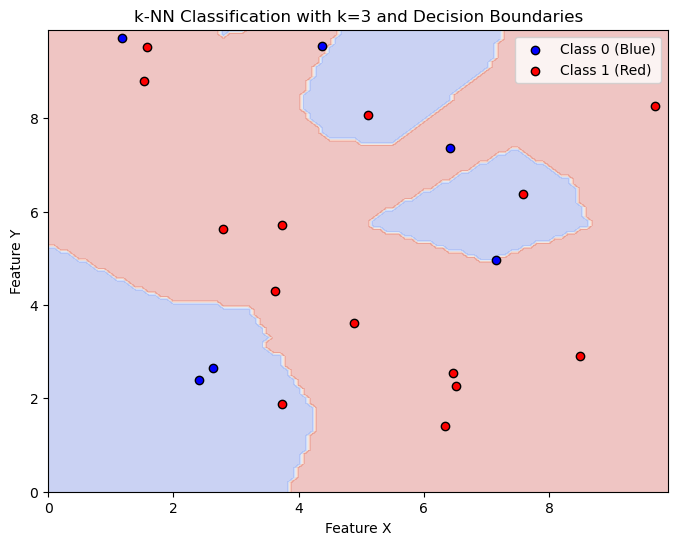

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)
X_train = np.random.uniform(1, 10, (20, 2)) 
y_train = np.random.choice([0, 1], size=20)  

k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

x_test_values = np.arange(0, 10, 0.1)
y_test_values = np.arange(0, 10, 0.1)
xx, yy = np.meshgrid(x_test_values, y_test_values)
X_test = np.c_[xx.ravel(), yy.ravel()] 

y_test_pred = knn.predict(X_test)

y_test_pred = y_test_pred.reshape(xx.shape)

plt.figure(figsize=(8, 6))

plt.contourf(xx, yy, y_test_pred, alpha=0.3, cmap=plt.cm.coolwarm)

plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Class 0 (Blue)', edgecolor='k')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Class 1 (Red)', edgecolor='k')

plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title(f'k-NN Classification with k={k} and Decision Boundaries')
plt.legend(loc='upper right')
plt.show()



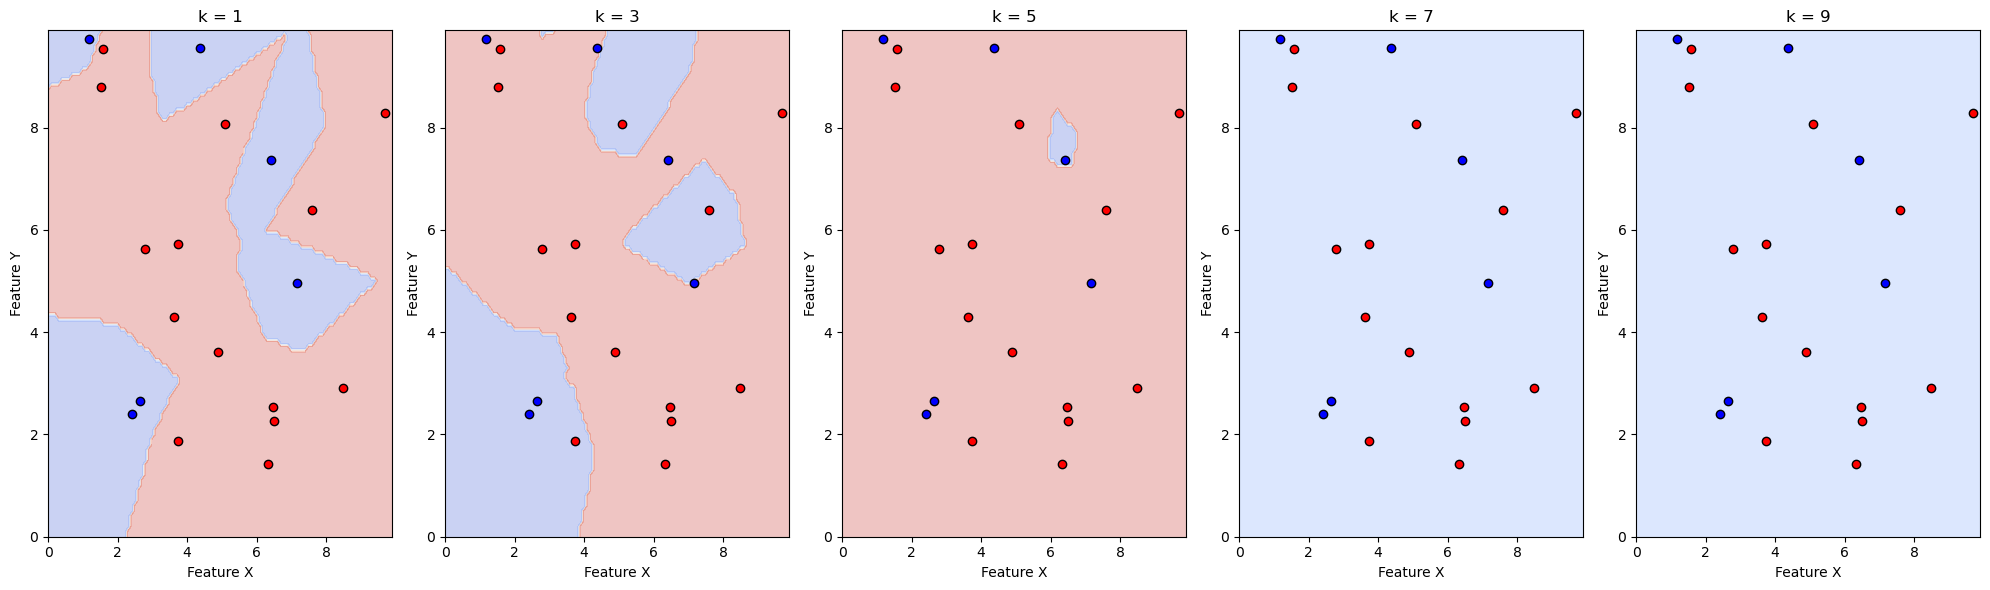

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)
X_train = np.random.uniform(1, 10, (20, 2)) 
y_train = np.random.choice([0, 1], size=20) 
x_test_values = np.arange(0, 10, 0.1)
y_test_values = np.arange(0, 10, 0.1)
xx, yy = np.meshgrid(x_test_values, y_test_values)
X_test = np.c_[xx.ravel(), yy.ravel()] 

k_values = [1, 3, 5, 7, 9]

fig, axs = plt.subplots(1, len(k_values), figsize=(20, 6))

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_test_pred = knn.predict(X_test)
    
    y_test_pred = y_test_pred.reshape(xx.shape)
    
    axs[i].contourf(xx, yy, y_test_pred, alpha=0.3, cmap=plt.cm.coolwarm)
    
    axs[i].scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Class 0', edgecolor='k')
    axs[i].scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Class 1', edgecolor='k')
    axs[i].set_title(f'k = {k}')
    axs[i].set_xlabel('Feature X')
    axs[i].set_ylabel('Feature Y')
    
plt.tight_layout()
plt.show()


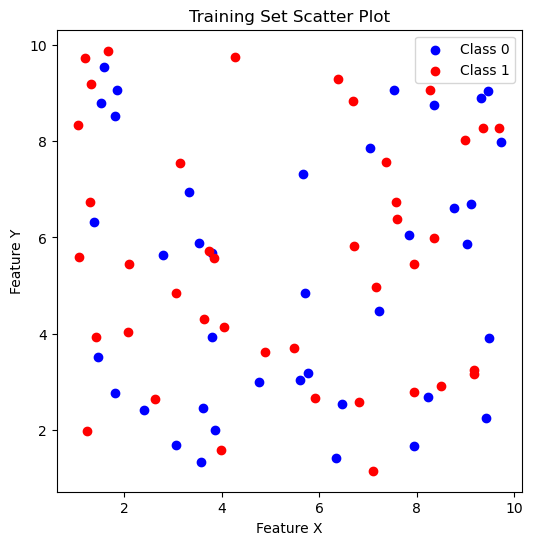

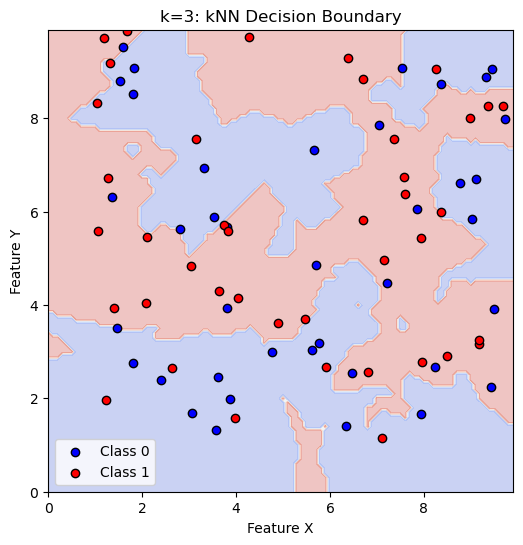

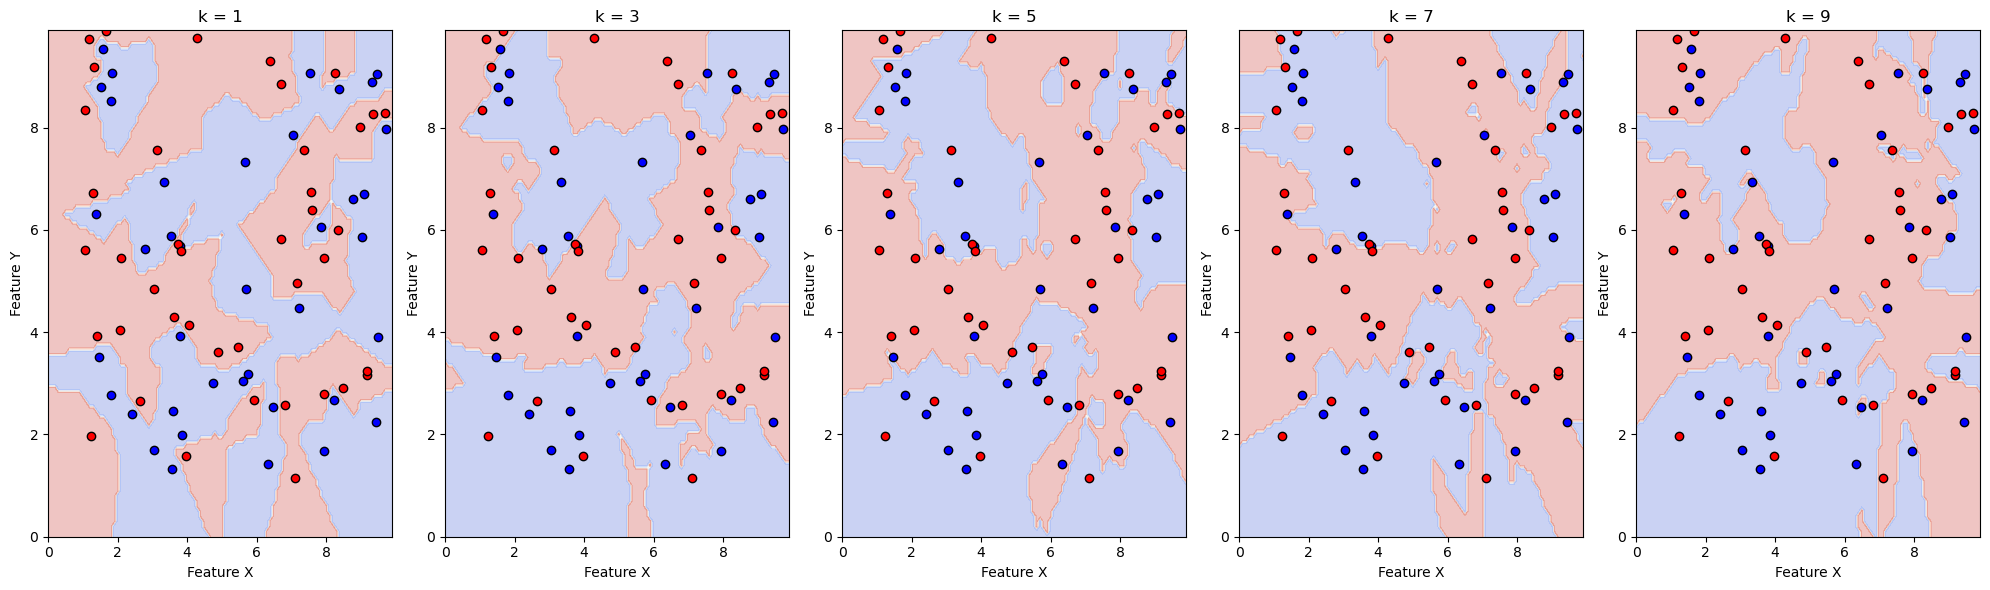

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = np.random.uniform(1, 10, (100, 2)) 
y = np.random.choice([0, 1], size=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(6, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Class 1')
plt.title('Training Set Scatter Plot')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.legend()
plt.show()

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

x_test_values = np.arange(0, 10, 0.1)
y_test_values = np.arange(0, 10, 0.1)
xx, yy = np.meshgrid(x_test_values, y_test_values)
X_test_grid = np.c_[xx.ravel(), yy.ravel()]
y_test_pred = knn.predict(X_test_grid)
y_test_pred = y_test_pred.reshape(xx.shape)

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, y_test_pred, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Class 0', edgecolor='k')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Class 1', edgecolor='k')
plt.title('k=3: kNN Decision Boundary')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.legend()
plt.show()

k_values = [1, 3, 5, 7, 9]
fig, axs = plt.subplots(1, len(k_values), figsize=(20, 6))

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test_grid)
    y_test_pred = y_test_pred.reshape(xx.shape)
    
    axs[i].contourf(xx, yy, y_test_pred, alpha=0.3, cmap=plt.cm.coolwarm)
    axs[i].scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Class 0', edgecolor='k')
    axs[i].scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Class 1', edgecolor='k')
    axs[i].set_title(f'k = {k}')
    axs[i].set_xlabel('Feature X')
    axs[i].set_ylabel('Feature Y')

plt.tight_layout()
plt.show()


In [13]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(42)
X = np.random.uniform(1, 10, (100, 2)) 
y = np.random.choice([0, 1], size=100) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {'n_neighbors': np.arange(1, 21)}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_
print(f"Best 'k' value: {best_k}")
print(f"Best cross-validated accuracy score: {best_score:.4f}")
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_test_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy with best 'k' value: {test_accuracy:.4f}")


Best 'k' value: 13
Best cross-validated accuracy score: 0.5250
Test accuracy with best 'k' value: 0.6500
